# Data Wrangling II 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
url = "StudentsPerformance.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


In [4]:
series1 = pd.notnull(df["Math_Score"])
df[series1].head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


### label encoding

In [5]:
le = LabelEncoder()
# male = 1 & female = 0
df['gender'] = le.fit_transform(df['gender'])
newdf=df
df.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,1
1,74,86,79,99,2018,3,NaN,1
2,65,80,69,97,2021,1,Nashik,1
3,64,79,76,77,2020,2,Pune,1
4,95,76,63,97,2018,3,Pune,1


### missing values

In [6]:
missing_values = ["Na", "na"]
#converts Na to NaN
df = pd.read_csv("StudentsPerformance.csv",na_values = missing_values)
df.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


In [7]:
ndf=df # creating a view 
ndf.fillna(0).head() # filling 0 to NaN fields

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,0,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


#### filling missing values using mean, median and standard deviation of that column.

In [8]:
# taking mean
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean()) 

# taking median
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].median())

# taking sd
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].std())
df.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


replacing missing values in forenoon column with minimum/maximum number
of that column

In [9]:
df["Math_Score"] = df["Math_Score"].fillna(df["Math_Score"].min())
df["Math_Score"] = df["Math_Score"].fillna(df["Math_Score"].max())
df.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


In [10]:
m_v=df['Math_Score'].mean()
df['Math_Score'].fillna(value=m_v, inplace=True)
df.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


In [11]:
ndf.replace(to_replace = np.nan, value = -99)
ndf.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


In [12]:
# drops or deletes rows with atleast 1 null value
ndf.dropna().head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male
6,74,92,80,98,2019,3,Nashik,Female


In [13]:
ndf.dropna(how = 'all').head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
1,74,86,79,99,2018,3,NaN,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male


In [14]:
# making new data frame with dropped NA values
new_data = ndf.dropna(axis = 0, how ='any')
new_data.head()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count,Region,gender
0,75,90,64,75,2019,2,Pune,Male
2,65,80,69,97,2021,1,Nashik,Male
3,64,79,76,77,2020,2,Pune,Male
4,95,76,63,97,2018,3,Pune,Male
6,74,92,80,98,2019,3,Nashik,Female


In [15]:
new_data.describe()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,72.105263,84.000000,70.947368,88.684211,2019.263158,2.315789
std,9.042460,6.200358,6.123486,8.439672,1.045738,0.749269
min,60.000000,76.000000,62.000000,75.000000,2018.000000,1.000000
25%,65.000000,79.000000,65.000000,81.500000,2018.500000,2.000000
50%,72.000000,84.000000,72.000000,91.000000,2019.000000,2.000000
75%,77.000000,89.500000,75.500000,96.000000,2020.000000,3.000000
max,95.000000,95.000000,80.000000,100.000000,2021.000000,3.000000


#### Detecting Outliers
     Boxplots
     Scatterplots
     Z-score
     Inter Quantile Range(IQR)

#### boxplot

KeyError: "['reading score', 'writing score', 'placement score'] not in index"

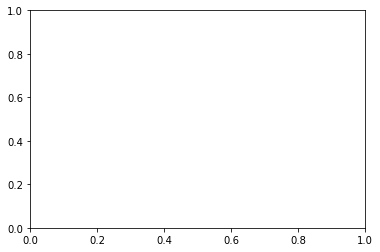

In [16]:
col = ['Math_Score', 'reading_score' , 'writing_score','placement_score']
df.boxplot(col)
plt.show()

In [ ]:
print(np.where(df['Math_Score']>90))
print(np.where(df['reading score']<25))
print(np.where(df['writing score']<30))

#### scatter plot 


In [ ]:
fig, ax = plt.subplots(figsize = (9,5))
ax.scatter(df['placement score'], df['placement offer count'])

# labels
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
ax.set_ylabel('(Full-value property-tax rate)/($10,000)')
plt.show()

In [ ]:
print(np.where((df['placement score']<50)&(df['placement score']>85)&(df['placement offer count']>1)))
print(np.where((df['placement offer count']<3)))

#### Z-Score
    Zscore = (data_point -mean) / std. deviation

In [ ]:
z = np.abs(stats.zscore(df['Math_Score']))
z.head()

In [ ]:
threshold = 0.18
sample_outliers = np.where(z <threshold)
sample_outliers

#### Detecting outliers using Inter Quantile Range(IQR)
    IQR = Quartile3 – Quartile1
    upper = Q3 +1.5*IQR
    lower = Q1 – 1.5*IQR
    
    In the above formula as according to statistics, the 0.5 scale-up of IQR
    (new_IQR = IQR + 0.5*IQR) is taken.

In [ ]:
sorted_rscore= sorted(df['reading score'])

In [ ]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
q1,q3

In [ ]:
IQR = q3-q1
lwr_bound=q1-(1.5*IQR)
upr_bound=q3+(1.5*IQR)
lwr_bound, upr_bound

In [ ]:
# Print Outliers

r_outliers = []
for i in sorted_rscore:
    if (i<lwr_bound or i>upr_bound):
        r_outliers.append(i)
print(r_outliers)

##### Trimming/removing the outlier:

In [ ]:
new_df=df
for i in sample_outliers:
    new_df.drop(i,inplace=True)
new_df.head()

#### Quantile based flooring and capping

In [ ]:
f=pd.read_csv(url)

df_stud=df

nintieth_percentile = np.percentile(df_stud['Math_Score'], 90)

b = np.where(df_stud['Math_Score']>nintieth_percentile,nintieth_percentile, df_stud['Math_Score'])
print("New array:")
b

In [ ]:
df_stud.insert(1,"m score",b,True)
df_stud.head()

In [ ]:
col = ['reading score']
df.boxplot(col)
plt.show()

In [ ]:
median=np.median(sorted_rscore)
median

In [ ]:
df2=df
df2['reading score']=np.where(df2['reading score']>upr_bound,median,df2['reading score'])
df2.head()

In [ ]:
col = ['reading score']
df.boxplot(col)
plt.show()

In [ ]:
new_df['Math_Score'].plot(kind = 'hist')
plt.show()

In [ ]:
df['log_math'] = np.log10(df['Math_Score'])
df['log_math'].plot(kind = 'hist')
plt.show()